<a href="https://colab.research.google.com/github/Anthonyyoyo/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/AnthonyG_LS_DS_113_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Y VARIABLE:
- Things we want to predict
- "Label"
-"Target"
- "dependent Variable"
- "predicted variable"

## X VARIABLE:
- The thing that "Causes" Y variable
- "predictor"
- "Explanatory variable"
- "Independent Variable"
- "feature"


## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [0]:
import random

In [2]:

dir(random)  # Reminding ourselves what we can do here

#You can set a random seed at say 60 to tell the generator where to start: 
#random.seed(60)

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [3]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data


#A variable
my_var = 5
#A Tuple
my_tuple = (5, 10)

#Named Tuples
from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [4]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

#Set random seed for reproducibility

random.seed(42)

for _ in range(250):
  # Desktop users
  time_on_site = random.uniform(10, 600)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  time_on_site = random.uniform(5, 300)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users[:10])

[User(purchased=False, time_on_site=150.42273427770718, mobile=False), User(purchased=True, time_on_site=284.06235530493245, mobile=True), User(purchased=True, time_on_site=140.37976895454653, mobile=True), User(purchased=True, time_on_site=49.206452507812216, mobile=True), User(purchased=False, time_on_site=167.81563803588924, mobile=True), User(purchased=False, time_on_site=20.484876517641524, mobile=True), User(purchased=False, time_on_site=167.3540069049869, mobile=True), User(purchased=False, time_on_site=447.75054592529114, mobile=False), User(purchased=True, time_on_site=57.93525538719398, mobile=True), User(purchased=True, time_on_site=292.6494305470663, mobile=True)]


In [0]:
# #Only the last code will be returned here even though we have 6peieces of code to run
# random.random()
# random.random()
# random.random()
# random.random()
# random.random()
# random.random()

In [6]:
# print(random.random())
# print(random.random())
# print(random.random())
# print(random.random())
# print(random.random())
# random.random()


#Lists are mutable - can be altered

my_list = [1, 2, 3, 4, 5]

my_list[3] = 10

print(my_list)


#Tuples - cannot be altered/are immutable
my_tuple = (2, 4, 6, 7)

print(my_tuple[1])

#Not allowed
#my_tuple[2] = 10

#But you can create new tuples based on old ones
my_tuple_1 = (2, 4, 10, 7)
print(my_tuple_1)

new_tuple = (my_tuple[1], 3)
print(new_tuple)


[1, 2, 3, 10, 5]
4
(2, 4, 10, 7)
(4, 3)


In [7]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
print(user_data.shape)
user_data.head()

(1000, 3)


,purchased,time_on_site,mobile
0,False,150.422734,False
1,True,284.062355,True
2,True,140.379769,True
3,True,49.206453,True
4,False,167.815638,True


In [8]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,5.789338167851291,5.836487686604824,7.267690340465448,7.280322437947023,7.733814701629437,7.772242279186957,7.994578759409748,8.373541587279558,9.106003254765849,9.38379653305911,9.615509927247123,9.848428900738856,10.23950442139964,10.337418715486669,10.586523414450706,10.718069679753153,10.997854148991385,11.012105109498041,11.706921559980145,12.091956561791557,12.382271645712285,12.75378790843838,12.995103670392169,13.370178930168896,15.920785346944974,16.135510245480567,16.75893133416585,16.773802946263586,16.868343577661772,17.362252869462687,17.479167161023454,17.922851319441314,18.36049180470949,18.567335759777762,19.359514766905985,19.468053978919983,19.833966879145127,20.484876517641524,20.710781715466965,20.814676916297277,...,513.5342908357718,515.4718990593212,517.1848861497105,518.3867964481467,518.4070711833585,520.1173607697788,524.578401914593,526.7532348231344,527.0568996188746,528.0256635303839,528.4459079156787,529.7098624749993,535.2695153363682,535.9412962281579,536.3859449458588,539.3527809076247,540.36553555062,542.6552719822238,543.3178572203369,548.4504252134441,549.5830779469206,561.9534019425959,564.1499127915823,564.814565730808,574.7557126020009,574.8174081072071,577.8952462993177,580.464571388533,581.5385253318037,581.7077917980032,582.5363605031145,582.9362427920347,588.8783154469735,590.65747470592,593.8187768755912,597.1381204299279,597.7116143416571,598.547187832115,599.088120104121,599.5766563635087
purchased,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,...,1,1,0,0,1,1,1,0,0,1,1,1,0,1,0,1,0,1,1,1,0,1,0,1,0,1,0,0,1,1,0,1,1,0,1,1,1,1,1,1
True,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0


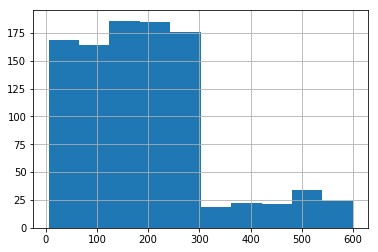

In [9]:
user_data['time_on_site'].hist(bins=10)


In [0]:
?pd.cut

In [11]:
#Looking for version of pandas - use double underscore 
print(pd.__version__)

0.24.2


In [12]:
! pip freeze

absl-py==0.7.1
alabaster==0.7.12
albumentations==0.1.12
altair==3.2.0
astor==0.8.0
astropy==3.0.5
atari-py==0.1.15
atomicwrites==1.3.0
attrs==19.1.0
audioread==2.1.8
autograd==1.3
Babel==2.7.0
backcall==0.1.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.6.3
bleach==3.1.0
blis==0.2.4
bokeh==1.0.4
boto==2.49.0
boto3==1.9.202
botocore==1.12.202
Bottleneck==1.2.1
branca==0.3.1
bs4==0.0.1
bz2file==0.98
cachetools==3.1.1
certifi==2019.6.16
cffi==1.12.3
chainer==5.4.0
chardet==3.0.4
Click==7.0
cloudpickle==0.6.1
cmake==3.12.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.1.3
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.14.6
cvxopt==1.2.3
cvxpy==1.0.15
cycler==0.10.0
cymem==2.0.2
Cython==0.29.13
daft==0.0.4
dask==1.1.5
dataclasses==0.6
datascience==0.10.6
decorator==4.4.0
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.0
distributed==1.25.3
Django==2.2.4
dlib==19.16.0
dm-sonnet==1.34
docopt==0.6.2
docutils==0.14
dopamine-rl==1.0.5
easy

In [13]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them
#we get an error saying: TypeError: Cannot cast array data from dtype('float64') to dtype('<U32') according to the rule 'safe' . this is because pd.crosstab is broken
#Downgrade pandas using: ! pip install pandas == 0.23.4 to install an earlier version of pandas

#OR

#We can use this code to solve it: time_bins = time_bins.astype(str)

import numpy as np

time_bins = pd.cut(user_data["time_on_site"], 5)  # 5 equal-sized bins
time_bins = time_bins.astype(str)

crosstab = pd.crosstab(user_data['purchased'], time_bins) 
print(crosstab)
type(crosstab)

pd.crosstab(user_data['purchased'], time_bins)

#crosstab[0:1]
#crosstab[1:2]

time_on_site  (124.547, 243.304]  ...  (5.196, 124.547]
purchased                         ...                  
False                        238  ...               227
True                         133  ...               106

[2 rows x 5 columns]


time_on_site,"(124.547, 243.304]","(243.304, 362.062]","(362.062, 480.819]","(480.819, 599.577]","(5.196, 124.547]"
purchased,,,,,
False,238,111,23,37,227
True,133,84,20,21,106


In [14]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

time_on_site,"(124.547, 243.304]","(243.304, 362.062]","(362.062, 480.819]","(480.819, 599.577]","(5.196, 124.547]"
purchased,,,,,
False,0.641509,0.569231,0.534884,0.637931,0.681682
True,0.358491,0.430769,0.465116,0.362069,0.318318


In [15]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.704,0.613333
True,0.296,0.386667


In [17]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?


pd.crosstab(user_data['purchased'], [time_bins, user_data['mobile']])

time_on_site (124.547, 243.304]        ... (5.196, 124.547]      
mobile                    False True   ...            False True 
purchased                              ...                       
False                        43   195  ...               37   190
True                         11   122  ...                4   102

[2 rows x 8 columns]

In [18]:
pd.crosstab(user_data['purchased'], [time_bins, user_data['mobile']], normalize = 'columns')

time_on_site (124.547, 243.304]            ... (5.196, 124.547]          
mobile                    False     True   ...            False     True 
purchased                                  ...                           
False                  0.796296  0.615142  ...         0.902439  0.650685
True                   0.203704  0.384858  ...         0.097561  0.349315

[2 rows x 8 columns]

In [22]:
pd.crosstab(time_bins, [user_data['purchased'], user_data['mobile']], normalize = 'columns')

purchased              False               True           
mobile                 False     True      False     True 
time_on_site                                              
(124.547, 243.304]  0.244318  0.423913  0.148649  0.420690
(243.304, 362.062]  0.204545  0.163043  0.243243  0.227586
(362.062, 480.819]  0.130682  0.000000  0.270270  0.000000
(480.819, 599.577]  0.210227  0.000000  0.283784  0.000000
(5.196, 124.547]    0.210227  0.413043  0.054054  0.351724

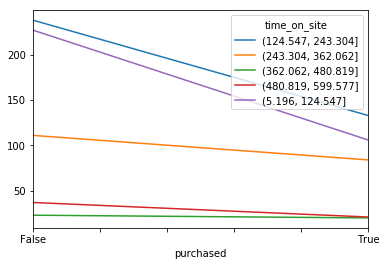

In [23]:
crosstab.plot()

In [26]:
ct = pd.crosstab(time_bins, [user_data['purchased'], user_data['mobile']], normalize = 'columns')
ct

purchased              False               True           
mobile                 False     True      False     True 
time_on_site                                              
(124.547, 243.304]  0.244318  0.423913  0.148649  0.420690
(243.304, 362.062]  0.204545  0.163043  0.243243  0.227586
(362.062, 480.819]  0.130682  0.000000  0.270270  0.000000
(480.819, 599.577]  0.210227  0.000000  0.283784  0.000000
(5.196, 124.547]    0.210227  0.413043  0.054054  0.351724

In [28]:
ct_final = ct.iloc[:, [2,3]]
print(ct_final)

purchased               True          
mobile                 False     True 
time_on_site                          
(124.547, 243.304]  0.148649  0.420690
(243.304, 362.062]  0.243243  0.227586
(362.062, 480.819]  0.270270  0.000000
(480.819, 599.577]  0.283784  0.000000
(5.196, 124.547]    0.054054  0.351724


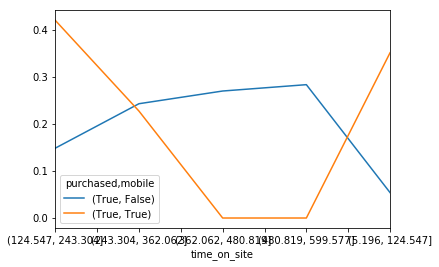

In [29]:
ct_final.plot()

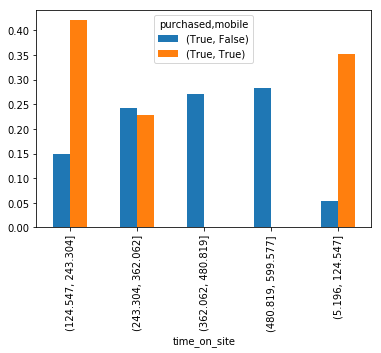

In [30]:
ct_final.plot(kind='bar')

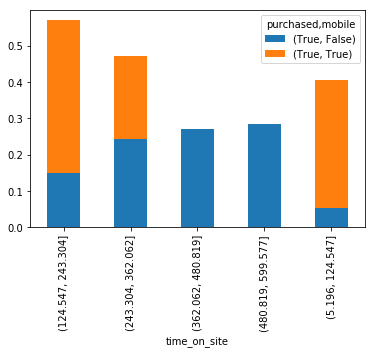

In [31]:
ct_final.plot(kind='bar', stacked = True)

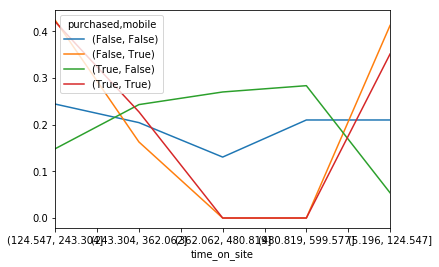

In [32]:
ct.plot()

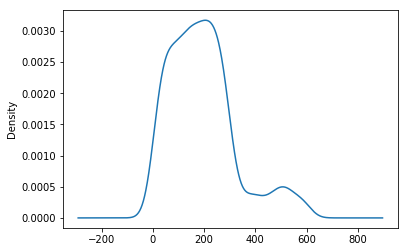

In [35]:
user_data['time_on_site'].plot.density()

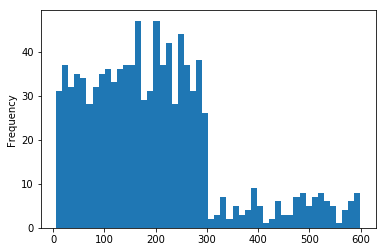

In [37]:
user_data['time_on_site'].plot.hist(bins=50)

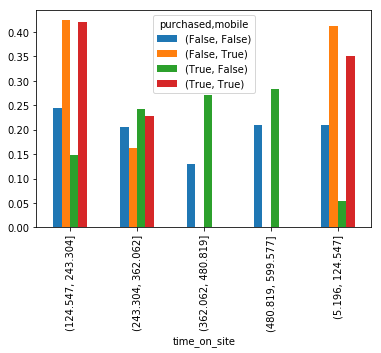

In [38]:
ct.plot(kind='bar')

In [41]:
#Pivot tables
pt = pd.pivot_table(user_data, values='purchased', index=time_bins)
pt

,purchased
time_on_site,
"(124.547, 243.304]",0.358491
"(243.304, 362.062]",0.430769
"(362.062, 480.819]",0.465116
"(480.819, 599.577]",0.362069
"(5.196, 124.547]",0.318318


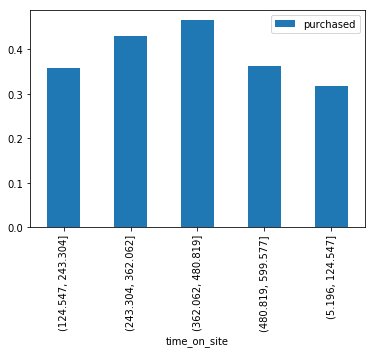

In [42]:
pt.plot.bar()